# Comparing compiler & NLP case study


# Stage 1  Lexical Analysis


# NLP

In [2]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk import pos_tag
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('treebank')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\treebank.zip.


True

In [18]:
sentence = "Hello Adam, how are you? I hope everything is going well.  Today is a good day, see you dude."

In [25]:
sentence = sentence.lower()
tokens = word_tokenize(sentence)
tagged = nltk.pos_tag(tokens)
tagged[0:6]

[('hello', 'NN'),
 ('adam', 'NN'),
 (',', ','),
 ('how', 'WRB'),
 ('are', 'VBP'),
 ('you', 'PRP')]

# Compiler

In [20]:
from rply import LexerGenerator

class Lexer():
    def __init__(self):
        self.lexer = LexerGenerator()

    def _add_tokens(self):
        # Print
        self.lexer.add('PRINT', r'print')
        # Parenthesis
        self.lexer.add('OPEN_PAREN', r'\(')
        self.lexer.add('CLOSE_PAREN', r'\)')
        # Semi Colon
        self.lexer.add('SEMI_COLON', r'\;')
        # Operators
        self.lexer.add('SUM', r'\+')
        self.lexer.add('SUB', r'\-')
        # Number
        self.lexer.add('NUMBER', r'\d+')
        # Ignore spaces
        self.lexer.ignore('\s+')

    def get_lexer(self):
        self._add_tokens()
        return self.lexer.build()

In [21]:
text_input = """
print(4 + 4 - 2);
"""

lexer = Lexer().get_lexer()
tokens = lexer.lex(text_input)

for token in tokens:
    print(token)

Token('PRINT', 'print')
Token('OPEN_PAREN', '(')
Token('NUMBER', '4')
Token('SUM', '+')
Token('NUMBER', '4')
Token('SUB', '-')
Token('NUMBER', '2')
Token('CLOSE_PAREN', ')')
Token('SEMI_COLON', ';')


# Stage 2 Syntax Analysis

In [13]:
from nltk.corpus import treebank
t = treebank.parsed_sents('wsj_0001.mrg')[0]
t.draw()

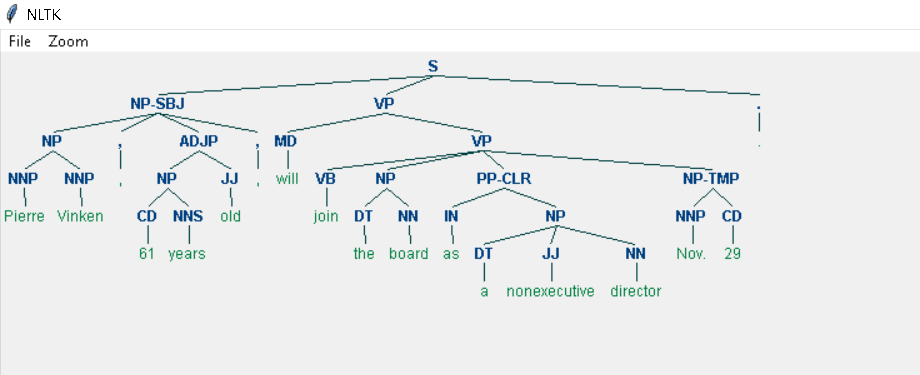

In [14]:
from IPython.display import Image
Image(filename='tree.png')

In [5]:
import ast
class AnalysisNodeVisitor(ast.NodeVisitor):
    def visit_Import(self,node):
        ast.NodeVisitor.generic_visit(self, node)

    def visit_ImportFrom(self,node):
        ast.NodeVisitor.generic_visit(self, node)

    def visit_Assign(self,node):
        print('Node type: Assign and fields: ', node._fields)
        ast.NodeVisitor.generic_visit(self, node)
    
    def visit_BinOp(self, node):
        print('Node type: BinOp and fields: ', node._fields)
        ast.NodeVisitor.generic_visit(self, node)

    def visit_Expr(self, node):
        print('Node type: Expr and fields: ', node._fields)
        ast.NodeVisitor.generic_visit(self, node)

    def visit_Num(self,node):
        print('Node type: Num and fields: ', node._fields)

    def visit_Name(self,node):
        print('Node type: Name and fields: ', node._fields)
        ast.NodeVisitor.generic_visit(self, node)

    def visit_Str(self, node):
        print('Node type: Str and fields: ', node._fields)

In [4]:
with open("dhkeygen.py", "r") as source:
    

In [7]:
with open("dhkeygen.py", "r") as source:
    p = tree = ast.parse(source.read())
v = AnalysisNodeVisitor()
v.visit(p)

Node type: Assign and fields:  ('targets', 'value')
Node type: Name and fields:  ('id', 'ctx')
Node type: Name and fields:  ('id', 'ctx')
Node type: Assign and fields:  ('targets', 'value')
Node type: Name and fields:  ('id', 'ctx')
Node type: Name and fields:  ('id', 'ctx')
Node type: BinOp and fields:  ('left', 'op', 'right')
Node type: BinOp and fields:  ('left', 'op', 'right')
Node type: Name and fields:  ('id', 'ctx')
Node type: Name and fields:  ('id', 'ctx')
Node type: Name and fields:  ('id', 'ctx')
Node type: BinOp and fields:  ('left', 'op', 'right')
Node type: BinOp and fields:  ('left', 'op', 'right')
Node type: Name and fields:  ('id', 'ctx')
Node type: Name and fields:  ('id', 'ctx')
Node type: Name and fields:  ('id', 'ctx')
